In [492]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
sns.set_style('darkgrid')

In [493]:
train = pd.read_csv('/Users/javadzabihi/Downloads/IS 733 Project/train.csv')
test = pd.read_csv('/Users/javadzabihi/Downloads/IS 733 Project/test.csv')

In [494]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [495]:
train.select_dtypes(exclude = ["object"]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [496]:
train.select_dtypes(include = ["object"]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [497]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# Visualization

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


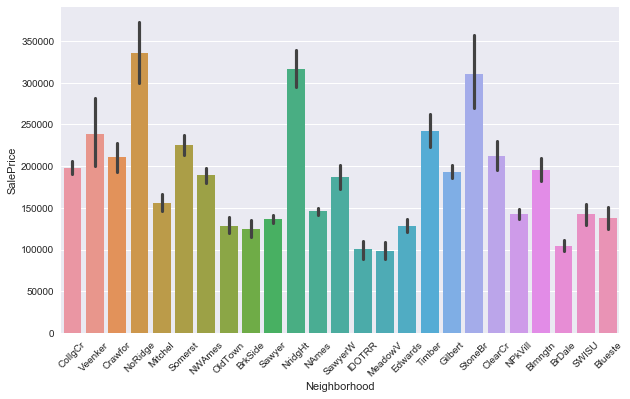

In [498]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(train['Neighborhood'],train['SalePrice'])
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()




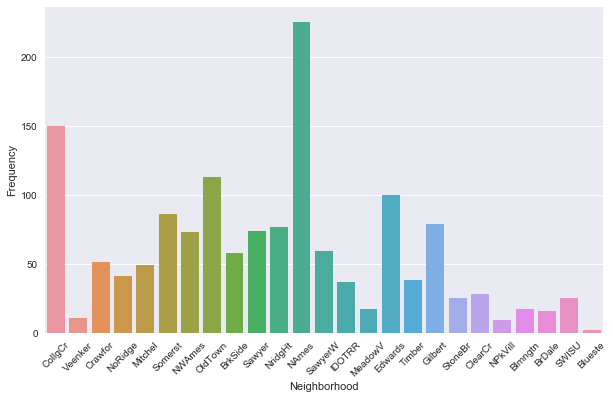

In [499]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(train['Neighborhood'])
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


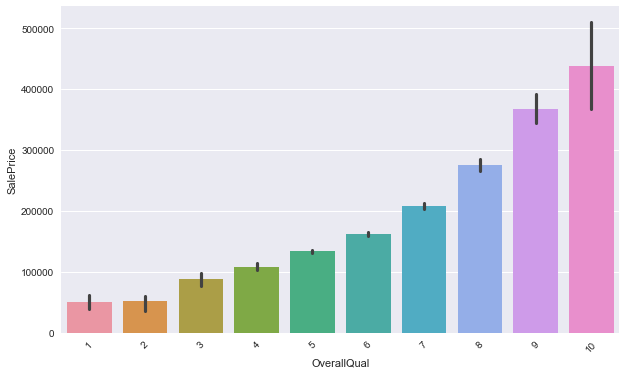

In [500]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(train['OverallQual'],train['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()





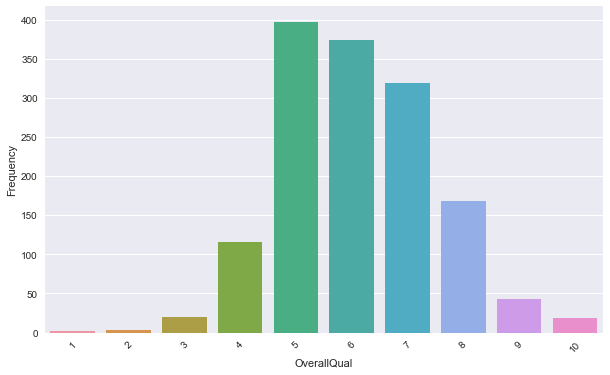

In [501]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(train['OverallQual'])
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()




# Listing Statistical properties

In [502]:
train[train.select_dtypes(exclude = ["object"]).columns].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Outliers detection

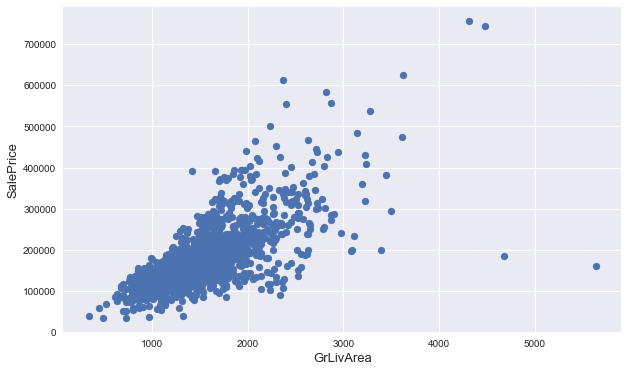

In [503]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

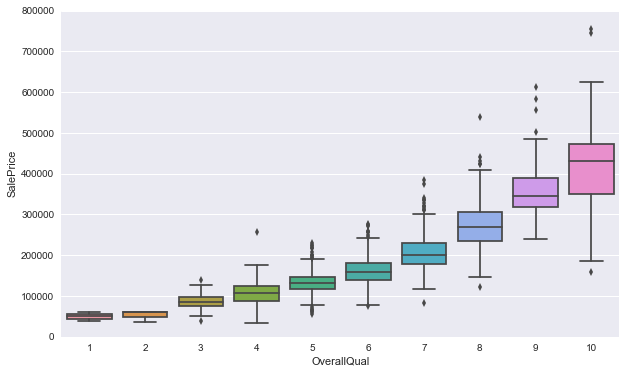

In [504]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=var, y="SalePrice", data=data).axis(ymin=0, ymax=800000)
plt.show()

In [505]:
# Percentile based outliers detection method which is based on inter quertile(IQR) range
def iqr_based_outliers(column):
    quartile_1, quartile_3 = np.percentile(column, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((column > upper_bound) | (column < lower_bound))

In [506]:
# Percentile based outliers detection
def percentile_based_outliers(column, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(column, [diff, 100 - diff])
    #return minval, maxval
    return np.where((column < minval) | (column > maxval))

In [507]:
# Median based outliers detection
def median_based_outliers(column, threshold=3.5):
    median_y = np.median(column)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in column])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in column]

    return np.where(np.abs(modified_z_scores) > threshold)

In [508]:
# standard deviation based outliers detection
def std_based_outliers(column, threshold=3):
    std = column.std()
    mean = column.mean()
    isOutlier = []
    for val in column:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return np.where(isOutlier)

In [509]:
# Majority vote based outliers detection

from itertools import chain

def MajorityVote_based_outliers(column):
    a = iqr_based_outliers(column)
    b = percentile_based_outliers(column)
    c = median_based_outliers(column)
    d = std_based_outliers(column)
    temp = a + b + c + d
    temp = list(chain.from_iterable(temp))
    final = []
    for i in np.unique(temp):
        if temp.count(i) >= 3:
            final.append(i)
    return final

# Data correlation 

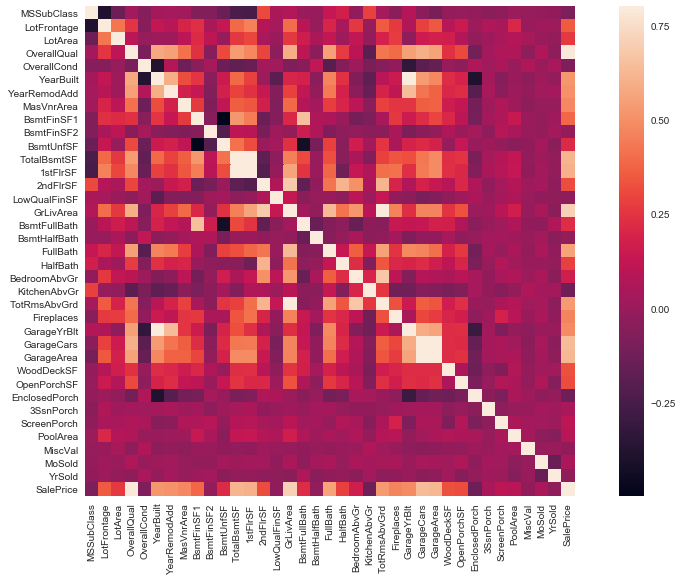

In [510]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

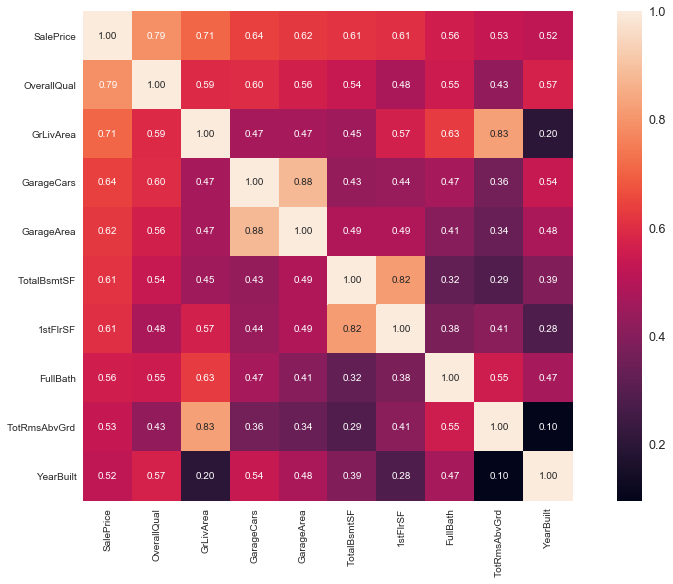

In [511]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice').index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(16, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [512]:
# We can see that there are several highly correlated features.
# They give almost the same information so multicollinearity really occurs.
# 'GarageArea' and 'GarageCars' ----> .89
# Keep 'GarageCars' since its correlation with 'SalePrice' is higher
# 'TotalBsmtSF' and '1stFlrSF' ----> .8
# Keep 'TotalBsmtSF' 
# 'TotRmsAbvGrd' and 'GrLivArea' ----> .83
# Keep 'GrLivArea' since its correlation with 'SalePrice' is higher

train.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd' ], axis = 1, inplace=True)
test.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd' ], axis = 1, inplace=True)

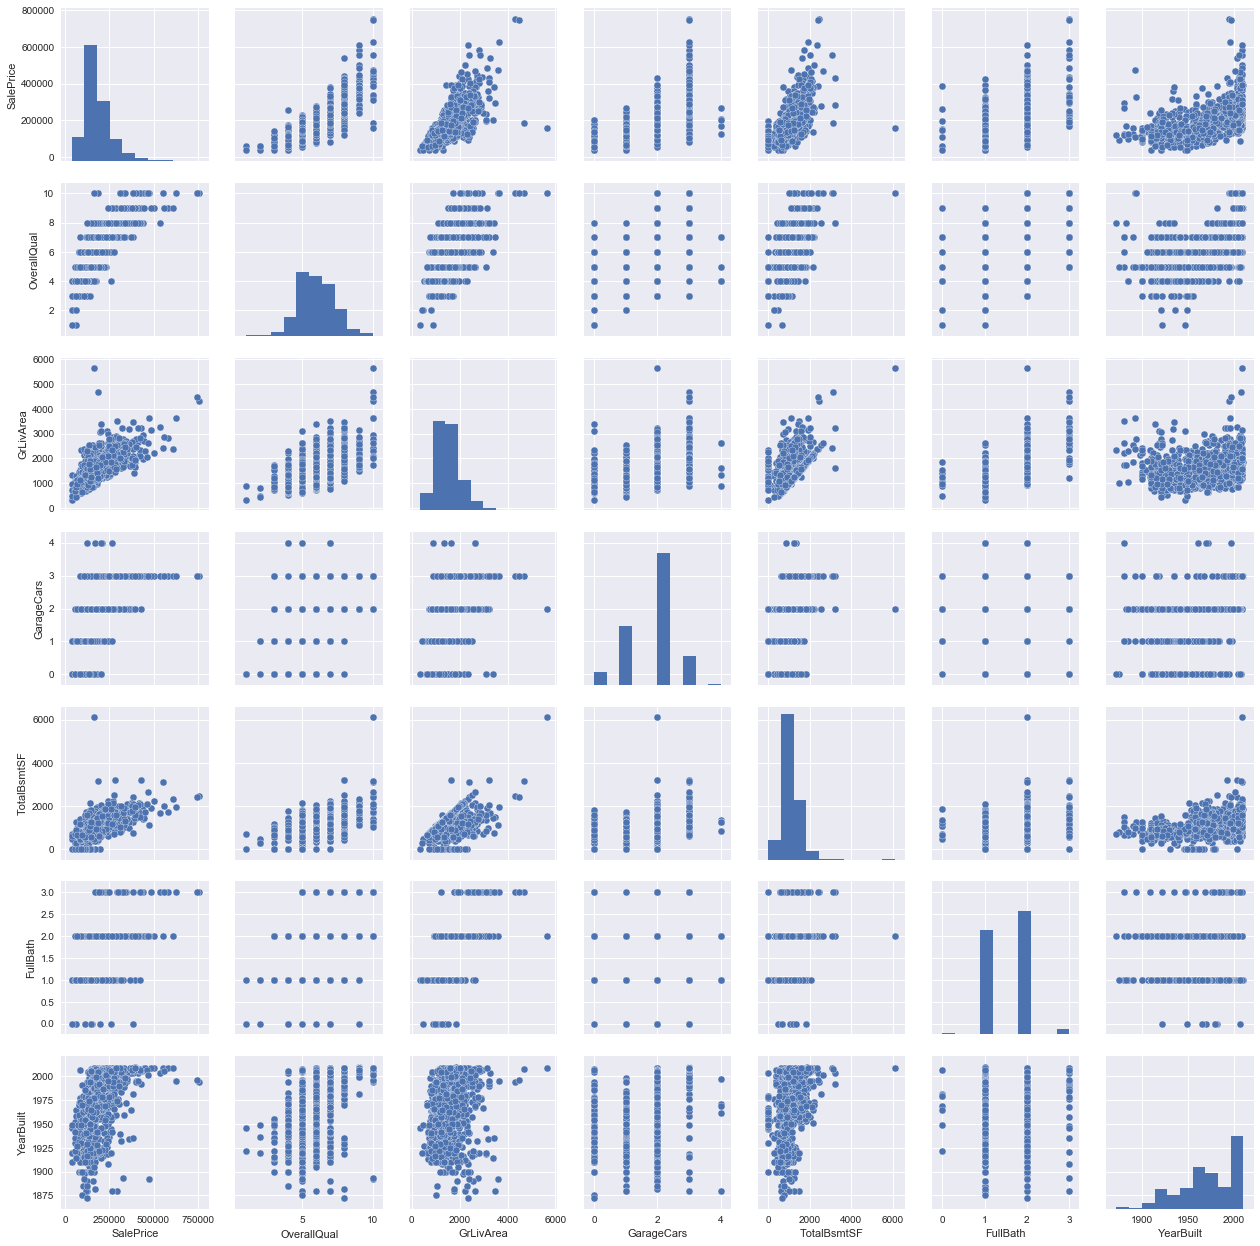

In [513]:
# Scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
        'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

# Target variable distribution

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


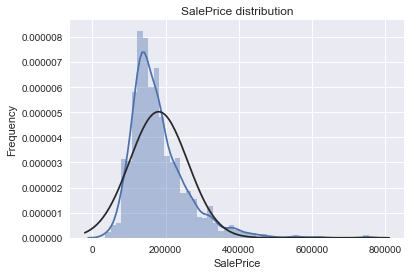

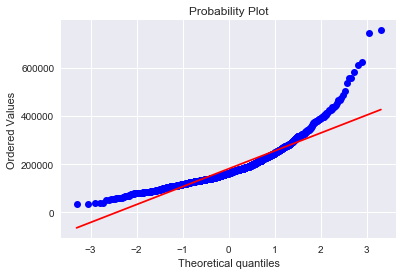

In [514]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


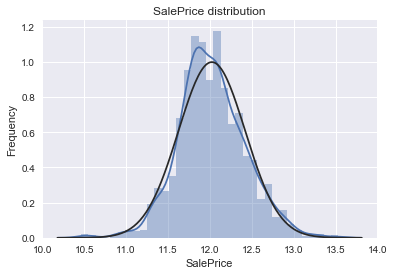

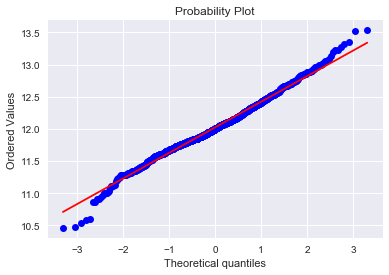

In [515]:
# The target variable is right skewed.
# We will try to transform target variable to make it normally distributed.
# fuction log1p applies log(1+x) to all elements of the target variable column
train["SalePrice"] = np.log1p(train["SalePrice"])

# Let's check the new distribution
# histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

# Finding missing values

In [516]:
# Concatenate the train and test data
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data_all = pd.concat((train,test)).reset_index(drop = True)
data_all.drop(['SalePrice'], axis=1, inplace=True)
total = data_all.isnull().sum().sort_values(ascending=False)
percent = (data_all.isnull().sum()/len(data_all)).sort_values(ascending=False)
missing_data_all = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_all.head(30)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageCond,159,0.054471


# Missing values imputation

In [517]:
# Alley : according to data description ----> NA means "no alley access"
data_all.loc[:, "Alley"] = data_all.loc[:, "Alley"].fillna("None")

# Functional : according to data description ----> NA means typical
data_all.loc[:, "Functional"] = data_all.loc[:, "Functional"].fillna("Typ")

# Fence : according to data description ----> NA means "no fence"
data_all.loc[:, "Fence"] = data_all.loc[:, "Fence"].fillna("No")

# BsmtQual etc : according to data description ----> NA for basement features is "no basement"
for column in ("BsmtFullBath", "BsmtHalfBath", "BsmtUnfSF", "BsmtFinSF1", 
               "BsmtFinSF2", "TotalBsmtSF"):
    data_all[column] = data_all[column].fillna(0)
        
for column in ("BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"):
    data_all[column] = data_all[column].fillna('No')
    
# FireplaceQu : according to data description ----> NA means "no fireplace"
data_all.loc[:, "FireplaceQu"] = data_all.loc[:, "FireplaceQu"].fillna("No")
data_all.loc[:, "Fireplaces"] = data_all.loc[:, "Fireplaces"].fillna(0)

# Functional : according to data description ----> NA means typical
data_all.loc[:, "Functional"] = data_all.loc[:, "Functional"].fillna("Typ")

# GarageType etc : according to data description ----> NA for garage features is "no garage"
for column in ("GarageCars", "GarageYrBlt"):
    data_all[column] = data_all[column].fillna(0)
        
for column in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    data_all[column] = data_all[column].fillna('No')

# MiscFeature : according to data description ----> NA means "no misc feature"
data_all.loc[:, "MiscFeature"] = data_all.loc[:, "MiscFeature"].fillna("No")
data_all.loc[:, "MiscVal"] = data_all.loc[:, "MiscVal"].fillna(0)
 

# PoolQC : according to data description ----> NA means "no pool"
data_all.loc[:, "PoolQC"] = data_all.loc[:, "PoolQC"].fillna("No")
data_all.loc[:, "PoolArea"] = data_all.loc[:, "PoolArea"].fillna(0)
    
for column in ("BedroomAbvGr", "CentralAir", "Condition1", "Condition2", "Electrical","EnclosedPorch",
               "ExterCond", "ExterQual", "Exterior1st", "Exterior2nd", "HalfBath",  "HeatingQC",
               "KitchenAbvGr", "KitchenQual", "LotFrontage", "LotShape", "MasVnrType", "MasVnrArea",
               "MSZoning", "OpenPorchSF", "PavedDrive", "SaleCondition", "SaleType", "ScreenPorch",
               "Utilities", "WoodDeckSF"):
    data_all[column] = data_all[column].fillna(data_all[column].mode()[0])
    

In [518]:
# Some numerical features are in fact categories

# MSSubClass=The building class
data_all['MSSubClass'] = data_all['MSSubClass'].apply(str)

# Changing OverallCond into a categorical variable
data_all['OverallCond'] = data_all['OverallCond'].astype(str)

# YearBuilt (or remodeled) makes sense (old houses are worth less)
# Year and month sold are transformed into categorical features
data_all['YrSold'] = data_all['YrSold'].astype(str)
data_all['MoSold'] = data_all['MoSold'].astype(str)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


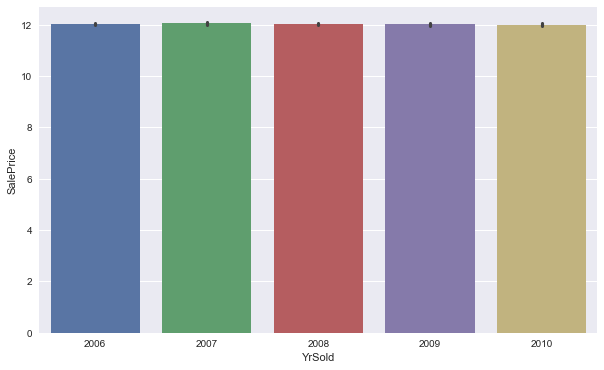

In [519]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data_all['YrSold'],y_train)
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.show()



/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


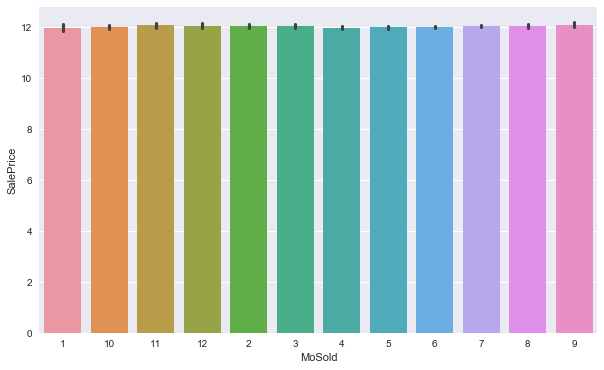

In [520]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data_all['MoSold'],y_train)
plt.xlabel('MoSold')
plt.ylabel('SalePrice')
plt.show()


In [521]:
# Encoding some categorical features as ordered numbers 
from sklearn.preprocessing import LabelEncoder
columns = ("Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtQual",
          "ExterCond", "ExterQual", "FireplaceQu", "Functional", "GarageCond", "GarageQual",
          "HeatingQC", "KitchenQual", "LandSlope", "LotShape", "PavedDrive", "PoolQC",
          "Street", "Utilities" )
# Apply LabelEncoder to categorical features
for col in columns:
    label = LabelEncoder() 
    label.fit(list(data_all[col].values)) 
    data_all[col] = label.transform(list(data_all[col].values))

In [522]:
# Checking remaining missing data if any
total = data_all.isnull().sum().sort_values(ascending=False)
percent = (data_all.isnull().sum()/len(data)).sort_values(ascending=False)
missing_data_all = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_all.head(3)

,Total,Percent
YrSold,0,0.0
Foundation,0,0.0
ExterCond,0,0.0


# Skewed features

In [523]:
numeric_features = data_all.dtypes[data_all.dtypes != "object"].index
# Check the skew of all numerical features
skewed_features = data_all[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(10)


,Skew
Utilities,54.000003
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891


In [524]:
# log transform skewed numeric features (threshold = 0.75)
skewed_features = skewed_features[np.abs(skewed_features) > 0.75]
skewed_features = skewed_features.index
data_all[skewed_features] = np.log1p(data_all[skewed_features])


In [525]:
# Getting dummy categorical features
data_all = pd.get_dummies(data_all)

In [526]:
train = data_all[:ntrain]
test = data_all[ntrain:]

In [527]:
# Feature importance with random forest
from sklearn.ensemble import RandomForestRegressor
X = train
y = y_train
features = X.columns
forest_model = RandomForestRegressor(n_estimators = 1000, random_state = 101, n_jobs = -1)
forest_model.fit(X, y)
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1][:20]
for i in range(len(indices)):
    print ("%2d) %-*s %f" % (i + 1, 20, features[indices[i]],importances[indices[i]]))



 1) OverallQual          0.556070
 2) GrLivArea            0.118518
 3) TotalBsmtSF          0.057370
 4) GarageCars           0.051725
 5) BsmtFinSF1           0.021964
 6) YearBuilt            0.016733
 7) LotArea              0.014620
 8) GarageYrBlt          0.010112
 9) YearRemodAdd         0.009328
10) CentralAir_Y         0.006921
11) 2ndFlrSF             0.006584
12) CentralAir_N         0.006333
13) Fireplaces           0.005732
14) BsmtUnfSF            0.005639
15) LotFrontage          0.005308
16) OpenPorchSF          0.004284
17) MSZoning_RM          0.004158
18) GarageType_Detchd    0.003914
19) MSZoning_C (all)     0.003769
20) WoodDeckSF           0.003179


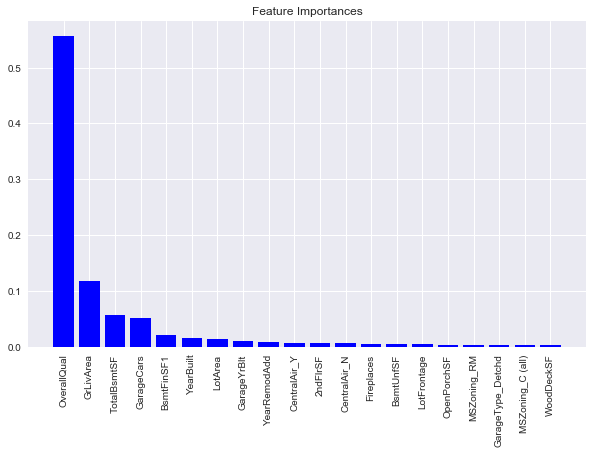

In [528]:
# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.show()
